# ***Project 3: Team Decision Makers***
## Jesse Kraynak &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Siriesha Mandava
## Mohamed Altoobli &nbsp;&nbsp;   Jeffery Boczkaja

# Skin Lesion Classification Project
This project focuses on classifying skin lesions using deep learning techniques. The dataset used for training and testing the model is the ISIC 2019 dataset, which consists of images of various skin lesions along with associated metadata.

<a href="https://colab.research.google.com/github/jkranyak/project_3/blob/main/master_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Initial setup and Library installation
Colab requires many libraries to be installed for use everytime you run a new notebook!

In [2]:
!pip install tensorflow
!pip install isic-cli
!pip install isic-cli
!pip install kaggle
!pip install imblearn
!pip install pydot

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.8/126.8 kB 2.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 267.1/267.1 kB 5.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 223.7/223.7 kB 16.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.5/49.5 kB 6.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 258.0/258.0 kB 2.1 MB/s eta 0:00:00


In [3]:
! isic user login

visit the following url in a browser:
https://api.isic-archive.com/oauth/authorize?response_type=code&client_id=RpCzc4hFjv5gOJdM2DM2nBdokOviOh5ne63Tpn7Q&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=gvU6UUkxwSPuVMEooBRbbff6EEMNmh&code_challenge=KUAEpR1A2lmGgd4UYNZqRqj1cFXiGhOHc1grpbpO1f8&code_challenge_method=S256
enter the code shown in your browser: GXRpYOMNYlHYmHTQVorXzjaDxuWYhA
Success!


In [4]:
!isic collection list

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ ID  ‚îÉ Name                                          ‚îÉ Public ‚îÉ Pinned ‚îÉ Locked ‚îÉ DOI             ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ 249 ‚îÇ BCN20000                                      ‚îÇ True   ‚îÇ False  ‚îÇ False  ‚îÇ None            ‚îÇ
‚îÇ 61  ‚îÇ Challenge 2016: Test                          ‚îÇ True   ‚îÇ True   ‚îÇ True   ‚îÇ None            ‚îÇ
‚îÇ 74  ‚îÇ Challenge 2016: Training                 

## Step 2: Query the Dataset
In this step, we interact with the ISIC API to query the dataset directly. We use specific API endpoints to perform operations such as listing available images, retrieving image metadata, and downloading images. This section covers setting up API requests, managing data retrieval, and handling query parameters to filter the dataset based on criteria such as diagnosis, image type, or other metadata.

In [5]:
import requests
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence, plot_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1_l2

from imblearn.over_sampling import SMOTE
from pathlib import Path
from google.colab import drive
from PIL import Image
from IPython.display import Image

In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Be sure to have kaggle API key ready to go in .json file. Place it into the 'content' folder.

Comment out if already running.

In [7]:
# Specify the current path of kaggle.json file
current_path = '/content/kaggle.json'

# Desired path where the Kaggle API expects the kaggle.json file
desired_path = '/root/.kaggle/kaggle.json'

if os.path.exists(current_path):
    os.makedirs(os.path.dirname(desired_path), exist_ok=True)
    os.rename(current_path, desired_path)

    # Set the file's permissions to avoid a permissions error
    os.chmod(desired_path, 0o600)
else:
    print(f"Error: '{current_path}' does not exist. Please upload the file.")

We will find the data set on kaggle.

Comment out if running and the images have been downloaded.

In [8]:
!kaggle datasets download -d andrewmvd/isic-2019


100% 9.08G/9.10G [01:02<00:00, 156MB/s]
100% 9.10G/9.10G [01:02<00:00, 157MB/s]


In [48]:
!unzip -q isic-2019.zip

replace ISIC_2019_Training_GroundTruth.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A



## Step 3: Data Preparation and Preprocessing DICOM Images
This step involves handling the metadata for the ISIC 2019 dataset, which which will be used for training, testing, and validation data. The processes highlighted in this step are crucial for understanding the dataset's structure and preparing it for subsequent analysis.

In [58]:
# Load the metadata
metadata = pd.read_csv('/content/ISIC_2019_Training_Metadata.csv')

# Display the first few rows of each DataFrame
metadata.head()

image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male

In [59]:
ground_truth = pd.read_csv('/content/ISIC_2019_Training_GroundTruth.csv')
ground_truth

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]

In [60]:
# Load the CSV files
ground_truth = pd.read_csv('/content/ISIC_2019_Training_GroundTruth.csv')
metadata = pd.read_csv('/content/ISIC_2019_Training_Metadata.csv')

image_dir = Path('/content/ISIC_2019_Training_Images')
ground_truth['image_path'] = ground_truth['image'].apply(lambda x: image_dir / f"{x}.jpg")

# Merge the ground_truth with metadata if necessary
full_metadata = pd.merge(ground_truth, metadata, on='image', how='left')  # Adjust 'on' parameter as needed
full_metadata

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   

                                              image_path  age_approx  \
0      /content/ISIC_2019_Training_Images/ISIC_000000...        55.0   
1      /content/ISIC_2019_Training_Images/ISIC_000000...        30.0   
2      /content/ISIC_2019_Training_Images/ISIC_000000...        60.0   
3      /content/ISIC_2019_Training_Images/ISIC_000000...        30.0   
4      /content/ISIC_2019_Training_Images/ISIC_000000...        80.0   
...                                                  ...         ...   
25326  /content/ISIC_2019_Training_Images/ISIC_007324...        85.0   
25327  /content/ISIC_2019_Training_Images/ISIC_007324...        65.0   
25328  /content/ISIC_2019_Training_Images/ISIC_007324...        70.0   
25329  /content/ISIC_2019_Training_Images/ISIC_007325...        55.0   
25330  /content/ISIC_2019_Training_Images/ISIC_007325...        50.0   

      anatom_site_general    lesion_id     sex  
0          anterior torso          NaN  female  
1          anterior torso          NaN  female  
2         upper extremity          NaN  female  
3         upper extremity          NaN    male  
4         posterior torso          NaN    male  
...                   ...          ...     ...  
25326           head/neck  BCN_0003925  female  
25327      anterior torso  BCN_0001819    male  
25328     lower extremity  BCN_0001085    male  
25329         palms/soles  BCN_0002083  female  
25330     upper extremity  BCN_0001079    male  

[25331 rows x 15 columns]

In [61]:
# Display the image paths for the first few entries
print(full_metadata['image_path'].head())

0    /content/ISIC_2019_Training_Images/ISIC_000000...
1    /content/ISIC_2019_Training_Images/ISIC_000000...
2    /content/ISIC_2019_Training_Images/ISIC_000000...
3    /content/ISIC_2019_Training_Images/ISIC_000000...
4    /content/ISIC_2019_Training_Images/ISIC_000000...
Name: image_path, dtype: object


In [62]:
# Correct the base path in 'image_path' column
correct_base_path = "/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input"

full_metadata['image_path'] = full_metadata['image'].apply(lambda x: f"{correct_base_path}/{x}.jpg")

# Verify the correction by printing the first few entries again
print(full_metadata['image_path'].head())


0    /content/ISIC_2019_Training_Input/ISIC_2019_Tr...
1    /content/ISIC_2019_Training_Input/ISIC_2019_Tr...
2    /content/ISIC_2019_Training_Input/ISIC_2019_Tr...
3    /content/ISIC_2019_Training_Input/ISIC_2019_Tr...
4    /content/ISIC_2019_Training_Input/ISIC_2019_Tr...
Name: image_path, dtype: object


In [80]:
img_path = full_metadata['image_path']

In [64]:
# Fill missing values for 'age_approx' with its median
full_metadata['age_approx'].fillna(full_metadata['age_approx'].median(), inplace=True)

# For categorical data, fill missing values with 'unknown'
full_metadata['anatom_site_general'].fillna('unknown', inplace=True)
full_metadata['sex'].fillna('unknown', inplace=True)

In [65]:
full_metadata = pd.get_dummies(full_metadata, columns=['anatom_site_general', 'sex'])

In [66]:
# Calculate the number of samples per class
class_counts = y_train.sum().sort_values(ascending=False)
print("Class counts before resampling:\n", class_counts)

# Find the maximum number of samples in any single class
max_samples = class_counts.max()

Class counts before resampling:
 NV      10308.0
MEL      3607.0
BCC      2665.0
BKL      2088.0
AK        690.0
SCC       524.0
DF        191.0
VASC      191.0
dtype: float64


## Step 4: Splitting Data into Training, Validation, and Testing Sets

The dataset is initially split into training and temporary sets, with the temporary set reserved for further division into validation and test sets. This method ensures that the model can be trained extensively, validated accurately, and finally tested to evaluate its performance on unseen data.



In [67]:
# Let's separate features and labels first
X = full_metadata.drop(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1)
y = full_metadata[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']]  # Excluded 'UNK'

# Now, we split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the X_temp and y_temp further into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Calculate the target number of samples
target_samples = int((3607 + 10308) / 2)  # adjust this as needed

# Create new DataFrame for the balanced dataset
X_train_resampled = pd.DataFrame(columns=X_train.columns)
y_train_resampled = pd.DataFrame(columns=y_train.columns)

New class counts after resampling:
 MEL      20651.0
NV        6957.0
BCC      25309.0
AK       77387.0
BKL      30227.0
DF      261561.0
VASC    261561.0
SCC      99679.0
dtype: float64


The classes are very unbalanced so we will add some synthetic data a couple of steps from now. First let's take a look at some of our images.

In [ ]:
def display_images(image_paths, num_images=5, resize_dim=None):
    """
    Display a set of images.

    Parameters:
        image_paths (pd.Series): Series of image paths.
        num_images (int): Number of images to display.
        resize_dim (tuple): Dimensions to resize the images to (width, height).
    """
    # Select a few images randomly or the first few if you prefer.
    selected_paths = image_paths.sample(n=num_images) if num_images < len(image_paths) else image_paths[:num_images]

    plt.figure(figsize=(20, 10))  # Adjust the size as per your requirement
    for i, img_path in enumerate(selected_paths, start=1):
        img = Image.open(img_path)
        if resize_dim:
            img = img.resize(resize_dim)
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Example usage:
# Assume X['image_path'] is your series of image paths
display_images(X['image_path'], num_images=5, resize_dim=(128, 128))

In [ ]:
# Iterate through each class and apply resampling
for column in y_train.columns:
    # Filter samples for the current class
    filter_mask = y_train[column] == 1
    X_class = X_train[filter_mask]
    y_class = y_train[filter_mask]

    num_samples = len(X_class)
    if num_samples > 0:
        if num_samples < target_samples:
            # Oversample minority classes
            X_class_resampled, y_class_resampled = resample(X_class, y_class,
                                                            replace=True,  # Sample with replacement
                                                            n_samples=target_samples,  # Match the target samples
                                                            random_state=42)
        else:
            # For majority or adequately represented classes, we might undersample or keep as is
            X_class_resampled, y_class_resampled = resample(X_class, y_class,
                                                            replace=False,
                                                            n_samples=target_samples,
                                                            random_state=42)

        # Append resampled data back to the overall dataset
        X_train_resampled = pd.concat([X_train_resampled, X_class_resampled], axis=0)
        y_train_resampled = pd.concat([y_train_resampled, y_class_resampled], axis=0)
    else:
        print(f"No instances to resample for class '{column}'")

# Shuffle the dataset to mix up class order (important for training)
X_train_resampled = X_train_resampled.sample(frac=1, random_state=42)
y_train_resampled = y_train_resampled.loc[X_train_resampled.index]

print("New class counts after resampling:\n", y_train_resampled.sum())

In [68]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(20264, 16) (20264, 8)
(2533, 16) (2533, 8)
(2534, 16) (2534, 8)


In [100]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Step 5: First Model Preperation and Training

We will use a Dual Input Generator for our first model and the following steps will prep, then train our model.

### Dual Input Data Generator

The `DualInputGenerator` class is a custom data generator for handling datasets that include both image paths and associated metadata. It is designed to work with Keras/TensorFlow, enabling efficient batch processing which is crucial for training deep learning models on large datasets. Here's a breakdown of its functionality:

- **Initialization (`__init__`)**: This method sets up the generator with all necessary parameters, including image paths, metadata, and labels. It also initializes the batch size, image size, and whether the dataset should be shuffled during training to introduce randomness into the training process.

- **Preprocessing (`preprocess_image`)**: A helper function to read and preprocess images. It converts images to the appropriate size and scale ([224x224] in this case) and normalizes pixel values to the range [0, 1].

- **Length Calculation (`__len__`)**: This method calculates how many batches are in the dataset, which is used by Keras during training to determine the number of steps per epoch.

- **Batch Generation (`__getitem__`)**: This method retrieves a batch of data by processing the images, metadata, and labels. It loads and preprocesses the images specified by the batch indexes, extracts the corresponding metadata, and gathers the labels. The function returns a list containing two arrays (images and metadata) and the batch of labels.

- **Epoch End Handling (`on_epoch_end`)**: If shuffling is enabled, this method shuffles the indexes after each epoch to ensure that the model does not see the same sequence of batches every epoch, helping the model to generalize better.

This structured approach ensures that the model receives properly formatted and preprocessed data for each training step, facilitating effective learning and performance improvement.


Dual Input Generator for creating a model

In [125]:
class DualInputGenerator(Sequence):
    def __init__(self, image_paths, metadata, labels, batch_size, img_size=(224, 224), shuffle=True):
        self.image_paths = image_paths
        self.metadata = metadata
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def preprocess_image(self, file_path):
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [224, 224])  # Ensuring image size is consistent
        img = img / 255.0  # Normalize to [0, 1]
        return img

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        # Calculate start and end indices for the current batch
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size
        # Handling last batch which might be smaller than batch_size
        end_idx = min(end_idx, len(self.image_paths))
        # Batch size might vary for the last batch
        current_batch_size = end_idx - start_idx
        # Initialize numpy arrays to hold batch data
        X_images = np.empty((current_batch_size, *self.img_size, 3))
        X_metadata = np.empty((current_batch_size, self.metadata.shape[1]))
        y = np.empty((current_batch_size, self.labels.shape[1]), dtype=int)
        # Generate data for the current batch
        for i, idx in enumerate(range(start_idx, end_idx)):
            # Get the image path for current index
            img_path = self.image_paths[idx]
            img = self.preprocess_image(img_path)  # Use self to call the method
            # Add processed image to the batch
            X_images[i, ] = img
            # Add corresponding metadata
            X_metadata[i, ] = self.metadata[idx]
            # Add corresponding label
            y[i, ] = self.labels[idx]
        return [X_images, X_metadata], y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

### Initializing Data Generators for Training, Validation, and Testing

To ensure our model is trained, validated, and tested with data that is efficiently loaded and preprocessed, we initialize three instances of the `DualInputGenerator` class:

- **Training Generator (`train_gen`)**: This generator is configured with training data paths, metadata, and labels. It is responsible for feeding the training data into the model in batches of 32, ensuring that each batch is shuffled to promote model generalization.

- **Validation Generator (`val_gen`)**: Similar to the training generator, but using the validation dataset. This generator provides data for evaluating the model during the training process, allowing us to monitor the model's performance and make adjustments if needed without seeing the test data.

- **Testing Generator (`test_gen`)**: Finally, the testing generator is set up using the test dataset to evaluate the model's performance after training has been completed. This step is crucial for assessing how well the model is likely to perform on unseen real-world data.

Each generator uses the `image_paths`, `metadata`, and `labels` from their respective subsets of the data, ensuring that the model receives all necessary inputs for making predictions during each phase of the training and evaluation process.



In [126]:
# Initialize the training generator
train_gen = DualInputGenerator(
    image_paths=X_train['image_path'].values,
    metadata=X_train.drop(columns=['image', 'image_path', 'lesion_id']).values,
    labels=y_train.values,  # Include labels for training set
    batch_size=32
)

# Initialize the validation generator
val_gen = DualInputGenerator(
    image_paths=X_val['image_path'].values,
    metadata=X_val.drop(columns=['image', 'image_path', 'lesion_id']).values,
    labels=y_val.values,  # Include labels for validation set
    batch_size=32
)

# Initialize the test generator
test_gen = DualInputGenerator(
    image_paths=X_test['image_path'].values,
    metadata=X_test.drop(columns=['image', 'image_path', 'lesion_id']).values,
    labels=y_test.values,  # Include labels for test set
    batch_size=32
)

X_test['image_path'].values

array(['/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0058443.jpg',
       '/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0034027.jpg',
       '/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0034082.jpg',
       ...,
       '/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0033029.jpg',
       '/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0027145.jpg',
       '/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0058873.jpg'],
      dtype=object)

### Dual Input Neural Network Architecture

The neural network architecture is designed to handle two types of input: images and metadata. Here's a breakdown of the model architecture and the role of each component:

#### Image Input Branch
- **Image Input**: The model starts with an image input layer that accepts images of shape (224, 224, 3).
- **Convolution and Pooling Layers**: Following the input, the model includes two sets of convolutional layers (`Conv2D`) and max pooling layers (`MaxPooling2D`). Each convolutional layer is followed by batch normalization (`BatchNormalization`), which helps to accelerate the training process and stabilize the learning environment by normalizing the activations.
- **Flattening and Dense Layer**: After extracting and pooling features through convolutions, the data is flattened (`Flatten`) and passed through a dense layer with ReLU activation, which is again batch normalized.

#### Metadata Input Branch
- **Metadata Input**: This branch begins with an input for metadata features, shaped dynamically based on the number of metadata features (`num_metadata_features`).
- **Dense Layers and Normalization**: It includes dense layers (`Dense`) with ReLU activation, interspersed with batch normalization to ensure the model learns effectively from the structured data.

#### Combining Branches
- **Concatenation**: The outputs of the image and metadata branches are combined into a single vector (`concatenate`), allowing the model to learn from both image features and metadata simultaneously.
- **Final Dense Layers**: The combined data is then passed through additional dense layers, including a dropout layer (`Dropout`) to prevent overfitting, culminating in a softmax output layer (`Dense`) that classifies the images into one of nine diagnostic categories.

#### Model Compilation
- The model is compiled with the Adam optimizer, using a learning rate of 1e-4. The loss function used is categorical crossentropy, suitable for multi-class classification tasks, and accuracy is used as the metric to evaluate model performance.

This dual-input setup allows the model to leverage both detailed image data and accompanying metadata, aiming to improve diagnostic accuracy compared to using images or metadata alone.


In [127]:
num_metadata_features = X_train.drop(columns=['image', 'image_path', 'lesion_id']).shape[1]
print("Number of metadata features:", num_metadata_features)

Number of metadata features: 13


In [128]:
num_metadata_features = 13

# Image input branch
image_input = Input(shape=(224, 224, 3), name='image_input')
x = Conv2D(32, (3, 3), activation='relu')(image_input)
# Add batch normalization here
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
# Add batch normalization here
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
image_branch = Dense(128, activation='relu')(x)
image_branch = BatchNormalization()(image_branch)

# Metadata input branch
metadata_input = Input(shape=(num_metadata_features,), name='metadata_input')
y = Dense(32, activation='relu')(metadata_input)
# Normalize after the first dense layer
metadata_branch = BatchNormalization()(y)
metadata_branch = Dense(64, activation='relu')(metadata_branch)
# Normalize before combining
metadata_branch = BatchNormalization()(metadata_branch)

# Combine the outputs of the two branches
combined = concatenate([image_branch, metadata_branch])
z = Dense(256, activation='relu')(combined)
 # Adding dropout for regularization
z = Dropout(0.5)(z)
# Adjust the number of units to match the number of classes
output = Dense(8, activation='softmax')(z)

# Create the model
model = Model(inputs=[image_input, metadata_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

### Model Checkpointing Configuration

The `ModelCheckpoint` callback in TensorFlow Keras is used to save the model at specific intervals or after achieving certain benchmarks during training. This setup is critical for preserving model states and allows for resuming training without losing previous progress. Here's a detailed explanation of the configuration:

- **Checkpoint Path**: Specifies the directory and filename structure for saving the model files. The path includes placeholders for the epoch number (`{epoch:02d}`) and validation accuracy (`{val_accuracy:.2f}`), allowing each file to uniquely represent the state of the model at the end of each epoch.
  



In [129]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/drive/My Drive/your_model_directory/model-{epoch:02d}-{val_accuracy:.2f}.hdf5"

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=3, save_best_only=True, mode='max')

In [130]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### TensorFlow Device Placement and Simple Matrix Multiplication

To gain insight into how TensorFlow allocates computing resources (such as CPU or GPU) for operations, the `set_log_device_placement` flag is enabled. This setting provides detailed logs showing which devices each operation is assigned to, assisting in debugging and optimizing performance.



In [131]:
tf.debugging.set_log_device_placement(True)

# Test with a simple computation
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# Run on GPU
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


### Configuring Callbacks for Model Training

To enhance the training process and ensure optimal model performance, we use a combination of callbacks in TensorFlow. These callbacks are set to monitor the training process and make decisions at the end of each epoch. Here's a breakdown of each callback used:

#### EarlyStopping
- **Purpose**: Prevents overfitting by halting the training if the model's validation loss does not improve for a specified number of consecutive epochs.
- **Configuration**:
  - `monitor='val_loss'`: Watches the validation loss metric for changes.
  - `patience=2`: Allows the training to continue for 2 epochs without improvements in validation loss.
  - `verbose=1`: Enables logging for when the training is stopped early.

#### ModelCheckpoint
- **Purpose**: Saves the model in its current state after each epoch, but only if the model's performance (based on the monitored metric) has improved.
- **Configuration**:
  - `filepath='best_model.h5'`: Specifies the location and filename where the best model version will be saved.
  - `monitor='val_loss'`: Monitors the validation loss for improvements.
  - `save_best_only=True`: Ensures that the model is saved only when its validation loss is at its lowest point seen so far.
  - `verbose=1`: Provides detailed logs when the model is saved.

These callbacks are essential tools for managing long training sessions effectively. They help conserve resources by stopping training when additional epochs would not lead to improvements (`EarlyStopping`) and by ensuring that only the best model version is saved (`ModelCheckpoint`), thus simplifying deployment and further evaluation.


In [132]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, verbose=1),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

### Training the Model
#### AND Re-Training, the first model resulted in 70% this is after going back to do futher augmentation

To train the dual-input model, we use the `model.fit` method provided by TensorFlow. This method executes the training cycle across a specified number of epochs, allowing for detailed monitoring and adjustments during the training process. Here's a breakdown of each parameter used in the `model.fit` call:

- **train_gen**: The training data generator, which supplies batches of image and metadata inputs along with the corresponding labels.
- **validation_data**: The validation data generator used to evaluate the model at the end of each epoch, helping monitor its performance on unseen data.
- **epochs**: Sets the total number of training cycles the model will undergo. In this case, the model is set to train for 10 epochs.
- **steps_per_epoch**: Specifies the number of batch steps to complete one epoch. This is set to the total number of batches available in the training generator (`len(train_gen)`), ensuring that each sample is used once per epoch.
- **validation_steps**: Determines the number of batch steps used for validating the model, set to the length of the validation generator.
- **callbacks**: Includes the `EarlyStopping` and `ModelCheckpoint` callbacks configured previously. These enhance the training process by:
  - **EarlyStopping**: Automatically stops training when the validation loss ceases to decrease, preventing overfitting.
  - **ModelCheckpoint**: Saves the best version of the model based on validation loss, ensuring that only the most accurate model is retained.

This configuration ensures that the model is not only trained but also validated effectively, with checkpoints saved automatically and training potentially halted early if no further gains are observed. This approach optimizes both the efficiency and efficacy of the model training process.



In [161]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    # Include callbacks for early stopping and model checkpointing
    callbacks=callbacks
)

Epoch 1/10
633/633 [==============================] - ETA: 0s - loss: 0.4290 - accuracy: 0.8559
Epoch 1: val_loss improved from 1.40850 to 1.14407, saving model to /content/best_student_model.keras
633/633 [==============================] - 404s 636ms/step - loss: 0.4290 - accuracy: 0.8559 - val_loss: 1.1441 - val_accuracy: 0.6578
Epoch 2/10
633/633 [==============================] - ETA: 0s - loss: 0.2460 - accuracy: 0.9249
Epoch 2: val_loss did not improve from 1.14407
633/633 [==============================] - 400s 631ms/step - loss: 0.2460 - accuracy: 0.9249 - val_loss: 1.1659 - val_accuracy: 0.6527
Epoch 3/10
633/633 [==============================] - ETA: 0s - loss: 0.1296 - accuracy: 0.9653
Epoch 3: val_loss did not improve from 1.14407
633/633 [==============================] - 404s 638ms/step - loss: 0.1296 - accuracy: 0.9653 - val_loss: 1.1896 - val_accuracy: 0.6531
Epoch 4/10
633/633 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9835
Epoch 4: val_lo

In [162]:
test_loss, test_accuracy = model.evaluate(test_gen, steps=len(test_gen))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

79/79 [==============================] - 25s 308ms/step - loss: 1.7448 - accuracy: 0.6713
Test Loss: 1.7448029518127441
Test Accuracy: 0.671281635761261


## Step 6: Model Summary and Visualization

The `model.summary()` method outputs the architecture of the model, listing each layer, its type, output shape, and number of parameters. This helps understanding the depth and complexity of the model's structure. Additionally, the `plot_model` function is used to generate a graphical representation of the model, which includes the shapes and names of each layer, offering a visual reference of the model's design.

### Generating and Evaluating Predictions

After training, predictions are generated for the test set using the `model.predict` method. This function computes the model's output predictions. The `np.argmax` function is then applied to these predictions to convert the model outputs from probabilities to explicit class predictions.

### Collecting True Classes and Generating Confusion Matrix

To evaluate the accuracy of our model's predictions, it is necessary to compare these predicted classes against the true classes from the test set. This comparison is facilitated through the collection of true class labels directly from the test generator. Subsequently, a confusion matrix is generated using the `confusion_matrix` function. This matrix visualizes the performance of a classification model, showing the actual versus predicted classifications, which helps in identifying how well the model is performing with respect to different classes. The `seaborn.heatmap` function is then used to plot the confusion matrix, providing a color-coded visualization of the results, which makes it easier to interpret the model's accuracy and misclassifications.

In [136]:
model.summary()

# Generate a plot of the model
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image_input (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 222, 222, 32)         896       ['image_input[0][0]']         
                                                                                                  
 batch_normalization_40 (Ba  (None, 222, 222, 32)         128       ['conv2d_16[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)         0         ['batch_normalization_40

In [164]:
# Generate predictions using the test generator
predictions = model.predict(test_gen, steps=len(test_gen))

# Obtain the predicted classes by taking the argmax of the predictions array
predicted_classes = np.argmax(predictions, axis=1)

# Since your test_gen should also be outputting the true classes in the same order as the predictions:
# We need to collect all true classes from the generator (in the same order)
true_classes = []
for _, labels in test_gen:
    true_classes.extend(np.argmax(labels, axis=1))
    if len(true_classes) >= len(predictions):
        break  # Stop once we have all the labels we need

# Generate the confusion matrix
cm = confusion_matrix(true_classes[:len(predictions)], predicted_classes)

print(cm)

79/79 [==============================] - 25s 312ms/step
[[ 228  151   25    6   14    0    0    7]
 [  85 1147   30    1   19    1    0    1]
 [  52   51  205    2   17    1    0   22]
 [  12    7   31   29   10    0    0    8]
 [  76   69   32    8   66    0    0    6]
 [   2   12    6    0    0    0    0    1]
 [   1   14    7    0    1    0    7    1]
 [  10    9   17    3    3    0    0   15]]


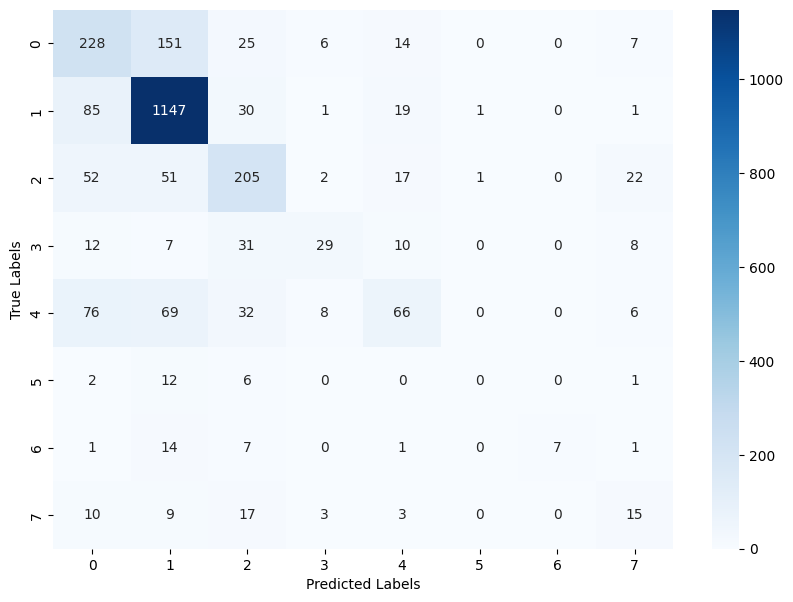

In [165]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Summary of Confusin Matrix
Classes 3, 4, 5, 6, and 7 show a particular need for augmentation due to low true positives and high confusion with other classes. Class 0 also needs attention due to being frequently confused with other high-incidence classes. These focused augmentations aim to enhance the model's ability to distinguish these classes more clearly, which should improve overall accuracy and reduce misclassifications.

## Step 7: Further Model Evaluation and Misclassification Analysis

The process starts by loading a previously trained model from disk using `load_model`. This model is then used to evaluate its performance on unseen data provided by a test generator. The evaluation consists of several steps:

#### Loading the Model
The model is loaded from a saved file, ensuring that the most effective version of the model, as determined by prior validations, is used for evaluations.

#### Fetching Predictions and Labels
A custom function `get_predictions_and_labels` is employed to iterate over the test generator. This function fetches batches of data (both images and metadata) and corresponding labels, then uses the model to predict each batch. Predictions and true labels are accumulated from all batches, allowing for comprehensive evaluation.

#### Calculating Confusion Matrix and Classification Report
Once predictions are gathered they are converted from softmax probabilities to class predictions using `np.argmax`. With predictions and true labels in hand, a confusion matrix is generated to visually assess the model's performance across different classes. This matrix highlights which classes are being confused with others, providing insight into potential biases or weaknesses in the model.

A classification report is also generated to provide key metrics for each class, such as precision, recall, and F1-score. This report helps in understanding the model's accuracy and identifying classes that might require more focus during further model training.

#### Visualizing Misclassified Examples
Finally, the script identifies and displays a set of misclassified images along with their true and predicted labels. This visualization is crucial for diagnosing what might be causing the errors, potentially guiding further data collection, augmentation strategies, or model adjustments.

Each of these steps plays a role in evaluating the model's real-world applicability and robustness, ensuring that the model not only performs but also meets practical expectations.

1/1 [==============================] - 0s 151ms/step
Confusion Matrix:
 [[ 236  129   34    3   25    0    0    4]
 [  94 1126   41    2   18    0    2    1]
 [  33   61  228    2   18    0    3    5]
 [  13    7   41   21   15    0    0    0]
 [  67   61   38    5   84    0    0    2]
 [   1    7   11    0    1    0    0    1]
 [   1    8    9    0    0    0   12    1]
 [  15    3   24    5    4    0    0    6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53       431
           1       0.80      0.88      0.84      1284
           2       0.54      0.65      0.59       350
           3       0.55      0.22      0.31        97
           4       0.51      0.33      0.40       257
           5       0.00      0.00      0.00        21
           6       0.71      0.39      0.50        31
           7       0.30      0.11      0.16        57

    accuracy                           0.68      2528
   macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


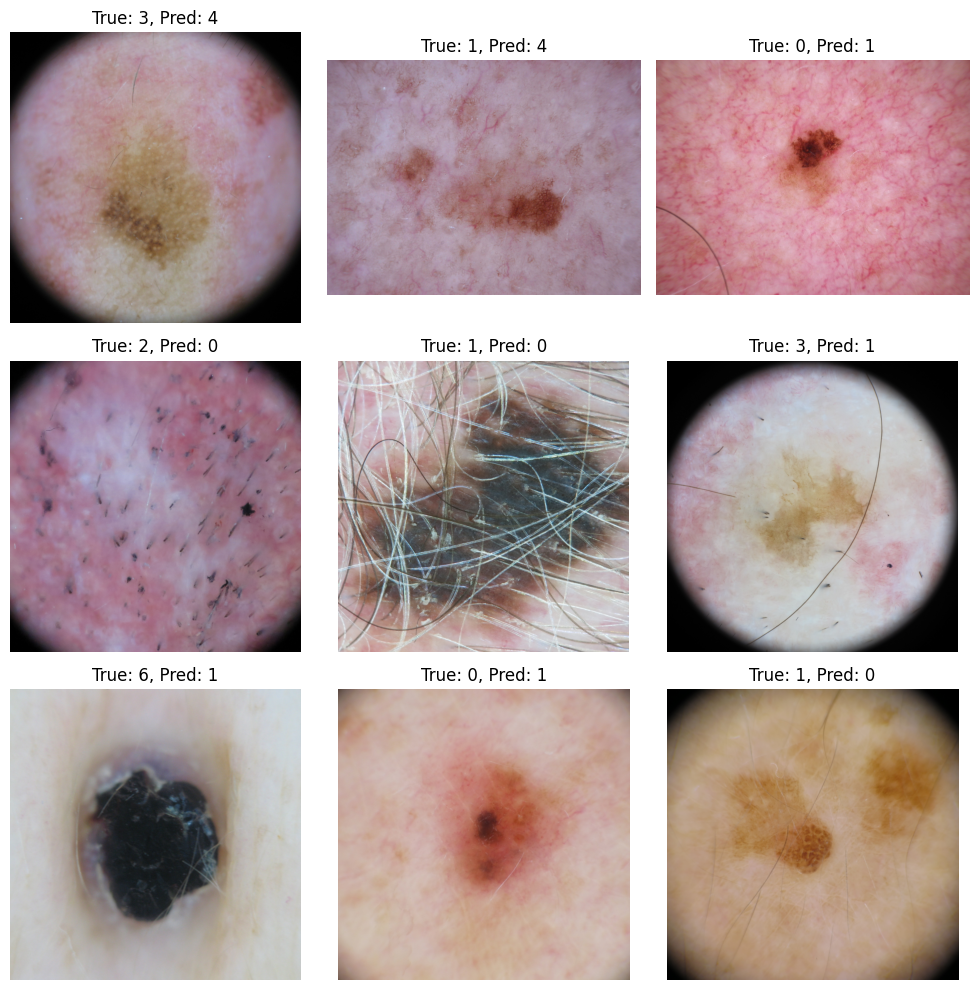

In [166]:
# Load the model
model = load_model('/content/best_model.h5')

# Function to fetch data and labels from the generator
def get_predictions_and_labels(generator):
    predictions = []
    true_labels = []
    for _ in range(len(generator)):
        # Getting the next batch of data
        (images, metadata), labels = generator.__getitem__(_)
        # Predict this batch
        batch_predictions = model.predict([images, metadata])
        # Store predictions and labels
        predictions.append(batch_predictions)
        true_labels.append(labels)

    # Concatenate all batches
    predictions = np.vstack(predictions)
    true_labels = np.vstack(true_labels)

    return predictions, true_labels

# Using the test generator to get predictions and labels
predictions, true_labels = get_predictions_and_labels(test_gen)

# Convert softmax probabilities to class predictions
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(true_labels, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix:\n', cm)

# Generate a classification report
print('\nClassification Report:\n', classification_report(true_classes, predicted_classes))

# Identify misclassified examples
misclassified_indices = np.where(predicted_classes != true_classes)[0]
print(f'Total misclassified samples: {len(misclassified_indices)}')

# Assuming you want to visualize some misclassified images:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(misclassified_indices):
        idx = misclassified_indices[i]
        img = test_gen.image_paths[idx]  # Assuming image paths are stored here
        true_label, pred_label = true_classes[idx], predicted_classes[idx]
        ax.imshow(plt.imread(img))  # Reading the image from path
        ax.set_title(f'True: {true_label}, Pred: {pred_label}')
        ax.axis('off')
plt.tight_layout()
plt.show()


Lets just run it a few more times and see if it can get any better before it gets any worse...

In [167]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from datetime import datetime

# Load the previously saved model
model = load_model('/content/best_model.h5')

# Define your callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, verbose=1),
    ModelCheckpoint(filepath='/content/best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Path where the checkpoint will be saved
model_dir = '/content/drive/My Drive/Colab Models'
# Generate a unique identifier based on the current date and time
unique_identifier = datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint_filepath = os.path.join(model_dir, f'best_model_{unique_identifier}.h5')


# Continue training with generators and include callbacks
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    # Adjust the total epochs as needed
    epochs=20,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=callbacks
)


Epoch 1/20
633/633 [==============================] - ETA: 0s - loss: 0.4236 - accuracy: 0.8615
Epoch 1: val_loss improved from inf to 1.03914, saving model to /content/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


633/633 [==============================] - 396s 624ms/step - loss: 0.4236 - accuracy: 0.8615 - val_loss: 1.0391 - val_accuracy: 0.6559
Epoch 2/20
633/633 [==============================] - ETA: 0s - loss: 0.2428 - accuracy: 0.9291
Epoch 2: val_loss did not improve from 1.03914
633/633 [==============================] - 396s 625ms/step - loss: 0.2428 - accuracy: 0.9291 - val_loss: 1.3713 - val_accuracy: 0.6408
Epoch 3/20
633/633 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9659
Epoch 3: val_loss did not improve from 1.03914
633/633 [==============================] - 399s 631ms/step - loss: 0.1276 - accuracy: 0.9659 - val_loss: 1.2087 - val_accuracy: 0.6586
Epoch 3: early stopping


### Evaluation of Classifier Performance Using ROC Curves

To evaluate the performance of the classifier on a per-class basis, the Receiver Operating Characteristic (ROC) curves and the Area Under the Curve (AUC) are computed. These metrics are crucial for assessing the model's ability to distinguish between classes. Here's a breakdown of the steps involved in this evaluation:

#### Preparing Labels and Predictions
Firstly, the true labels are converted to a 1-dimensional array if they are not already in this format, ensuring they can be directly compared with the predicted probabilities. Predictions are checked to ensure they contain a probability for each class.

#### Computing ROC Curves and AUC Values
For each class, the ROC curve is calculated by:
- Isolating the prediction probabilities for that class.
- Creating a binary outcome array for the class, where the class of interest is labeled `1` and all others `0`.
- Using the `roc_curve` function from `sklearn.metrics` to compute the true positive rate (TPR) and false positive rate (FPR) at various threshold settings.
- Calculating the AUC value to quantify the overall ability of the model to discriminate between positive and negative classes for each specific class.

#### Plotting the ROC Curves
Each class's ROC curve is plotted with a unique color, and the AUC score is displayed in the legend to provide a visual and numerical representation of classifier performance. The diagonal line represents a random classifier's performance for comparison.

- **X-axis**: False Positive Rate (FPR) ‚Äî represents the proportion of negative data points that are mistakenly considered positive.
- **Y-axis**: True Positive Rate (TPR) ‚Äî represents the proportion of actual positives correctly identified.

The area under each curve (AUC) provides a single measure of overall performance regardless of the classification threshold. The closer the AUC is to 1, the better the model is at predicting positive classes as positive and negative classes as negative. Values closer to 0.5 suggest no discriminative ability, equivalent to random guessing.

This detailed analysis helps in identifying which classes the model performs well on and which ones might require further tuning, potentially guiding further data augmentation, additional training, or algorithm adjustments.


Predictions appear to be properly formatted.


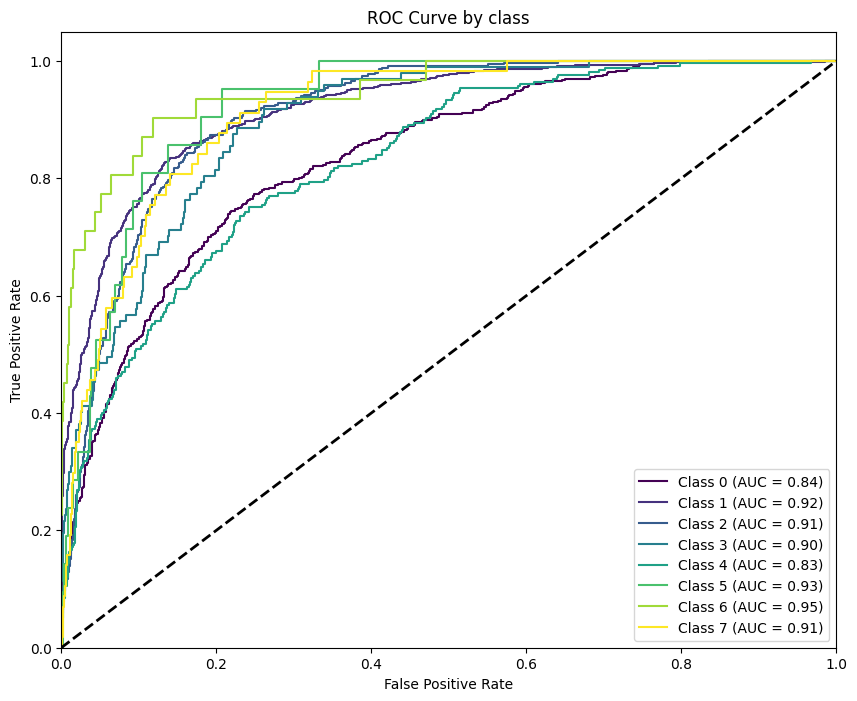

In [168]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure that true_labels is a 1D array of class indices
if len(true_labels.shape) > 1:
    true_labels = np.argmax(true_labels, axis=1)

# Ensure predictions are probabilities
if predictions.shape[1] == len(np.unique(true_labels)):
    print("Predictions appear to be properly formatted.")

n_classes = len(np.unique(true_labels))
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    # Isolate the probabilities for the current class
    class_probs = predictions[:, i]
    # Create a binary outcome for this class
    class_true = (true_labels == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(class_true, class_probs)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, n_classes))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by class')
plt.legend(loc="lower right")
plt.show()

### Knowledge Distillation:
Uses our current model (the "teacher") to train a simpler model (the "student"). The student model learns to mimic the teacher model's behavior while often generalizing better on unseen data due to its simplicity.

### Fine-tuning with Regularization:
Load the weights of the best model and continue training with increased regularization (L1/L2 regularization) to force the model to learn more robust features, just because these students are in a BOOTCAMP.

In [169]:
# Load the teacher model
teacher_model = load_model('/content/best_model.h5')

# Define the student model with increased regularization
def build_student_model(input_shape_image=(224, 224, 3), num_metadata_features=13, num_classes=8):
    # Image input branch - Reuses the same architecture as the teacher model
    image_input = Input(shape=input_shape_image, name='image_input')
    x = Conv2D(32, (3, 3), activation='relu')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    image_branch = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)

    # Metadata input branch - Simplified version of the teacher model
    metadata_input = Input(shape=(num_metadata_features,), name='metadata_input')
    y = Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(metadata_input)
    metadata_branch = BatchNormalization()(y)

    # Combine the outputs of the two branches
    combined = concatenate([image_branch, metadata_branch])
    z = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(combined)
    z = Dropout(0.5)(z)
    output = Dense(num_classes, activation='softmax')(z)

    # Create the student model
    student_model = Model(inputs=[image_input, metadata_input], outputs=output)

    # Compile the student model
    student_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    return student_model

# Build the student model
student_model = build_student_model()

# Define callbacks for the student model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    ModelCheckpoint(filepath='/content/student_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Initialize the training generator
train_gen = DualInputGenerator(
    image_paths=X_train['image_path'].values,
    metadata=X_train.drop(columns=['image', 'image_path', 'lesion_id']).values,
    labels=y_train.values,
    batch_size=32
)

# Initialize the validation generator
val_gen = DualInputGenerator(
    image_paths=X_val['image_path'].values,
    metadata=X_val.drop(columns=['image', 'image_path', 'lesion_id']).values,
    labels=y_val.values,
    batch_size=32
)

# Fit the student model -
history = student_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=callbacks
)

Epoch 1/10
633/633 [==============================] - ETA: 0s - loss: 3.0004 - accuracy: 0.4322
Epoch 1: val_loss improved from inf to 2.15660, saving model to /content/student_best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


633/633 [==============================] - 426s 670ms/step - loss: 3.0004 - accuracy: 0.4322 - val_loss: 2.1566 - val_accuracy: 0.5249
Epoch 2/10
633/633 [==============================] - ETA: 0s - loss: 2.2117 - accuracy: 0.4901
Epoch 2: val_loss improved from 2.15660 to 1.95353, saving model to /content/student_best_model.h5
633/633 [==============================] - 427s 675ms/step - loss: 2.2117 - accuracy: 0.4901 - val_loss: 1.9535 - val_accuracy: 0.5411
Epoch 3/10
633/633 [==============================] - ETA: 0s - loss: 2.0943 - accuracy: 0.5110
Epoch 3: val_loss improved from 1.95353 to 1.89001, saving model to /content/student_best_model.h5
633/633 [==============================] - 427s 674ms/step - loss: 2.0943 - accuracy: 0.5110 - val_loss: 1.8900 - val_accuracy: 0.5190
Epoch 4/10
633/633 [==============================] - ETA: 0s - loss: 1.9879 - accuracy: 0.5124
Epoch 4: val_loss improved from 1.89001 to 1.88278, saving model to /content/student_best_model.h5
633/633 [=

In [170]:
# Define the path where the model should be saved
model_path = '/content/best_student_model.keras'

# Save the model
student_model.save(model_path)

print(f"Model saved successfully at {model_path}")


Model saved successfully at /content/best_student_model.keras


In [171]:
test_loss, test_accuracy = student_model.evaluate(test_gen)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

79/79 [==============================] - 25s 312ms/step - loss: 1.7658 - accuracy: 0.5352
Test Loss: 1.765763282775879
Test Accuracy: 0.5352057218551636


### These students requires a lot of training....
but it looks like they are improving over time.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set the filepath for the saved model
filepath = '/content/best_student_model.keras'

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch'
)

# Define the EarlyStopping callback to stop training when no improvement is seen
early_stopping = EarlyStopping(
    monitor='val_loss',
    # Adjust the patience parameter based on your tolerance for waiting,
    # this one is set high because im going to bed...
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# List of callbacks
callbacks = [checkpoint, early_stopping]

# Continue training the model
history_continued = student_model.fit(
    train_gen,
    validation_data=val_gen,
    # We set a higher number since training will stop automatically
    epochs=50,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=callbacks
)


Epoch 1/50
633/633 [==============================] - ETA: 0s - loss: 1.5688 - accuracy: 0.5607
Epoch 1: val_loss improved from inf to 1.63145, saving model to /content/best_student_model.keras
633/633 [==============================] - 424s 669ms/step - loss: 1.5688 - accuracy: 0.5607 - val_loss: 1.6314 - val_accuracy: 0.5368
Epoch 2/50
633/633 [==============================] - ETA: 0s - loss: 1.5010 - accuracy: 0.5742
Epoch 2: val_loss improved from 1.63145 to 1.53034, saving model to /content/best_student_model.keras
633/633 [==============================] - 423s 667ms/step - loss: 1.5010 - accuracy: 0.5742 - val_loss: 1.5303 - val_accuracy: 0.6127
Epoch 3/50
633/633 [==============================] - ETA: 0s - loss: 1.4759 - accuracy: 0.5811
Epoch 3: val_loss did not improve from 1.53034
633/633 [==============================] - 418s 660ms/step - loss: 1.4759 - accuracy: 0.5811 - val_loss: 1.5695 - val_accuracy: 0.5985
Epoch 4/50
633/633 [==============================] - ETA: 0

In [ ]:
test_loss, test_accuracy = student_model.evaluate(test_gen)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Let's see how they perform as a team!

In [ ]:
# Assuming models are already loaded; otherwise, load them:
teacher_model = load_model('/content/best_model.h5')
student_model = load_model('/content/best_student_model.keras')

# Function to evaluate ensemble accuracy
def evaluate_ensemble_accuracy(teacher_model, student_model, test_gen):
    correct_count = 0
    total_count = 0

    # Correctly unpack the data from the generator
    for (images, metadata), labels in test_gen:
        # Predict with both models
        teacher_predictions = teacher_model.predict([images, metadata])
        student_predictions = student_model.predict([images, metadata])

        # Average the predictions
        averaged_predictions = (teacher_predictions + student_predictions) / 2

        # Convert probabilities to predicted class index
        predicted_classes = np.argmax(averaged_predictions, axis=1)
        true_classes = np.argmax(labels, axis=1)  # Assuming labels are one-hot encoded

        # Increment correct count
        correct_count += np.sum(predicted_classes == true_classes)
        total_count += labels.shape[0]

    # Calculate accuracy
    accuracy = correct_count / total_count
    return accuracy

# Evaluate ensemble accuracy using the provided test generator
accuracy = evaluate_ensemble_accuracy(teacher_model, student_model, test_gen)
print("Ensemble accuracy: {:.2f}%".format(accuracy * 100))

# Step 8: **The Interface** ‚ö°

---



User Interface (UI)
A simple web-based UI allows users to upload lesion images, input relevant metadata, and receive a prediction. We will use Gradio as learned in class for this model.

In [ ]:
! pip install gradio --upgrade
! pip install --upgrade gradio
! pip install gradio ai

In [150]:
import gradio as gr
from gradio import Image, Number, Radio, Dropdown

import numpy as np
from PIL import Image
import os
from PIL import Image as PILImage

import tensorflow as tf
from tensorflow import keras

import openai

### Model Loading and Prediction Testing

#### Loading the Pre-trained Model
The script begins by loading a pre-trained model from a specified path. This model is essential for predicting the type of skin lesions based on image data and associated metadata.

#### Model Architecture Overview
Once the model is loaded, `model.summary()` is called to print the architecture of the model. This summary provides insight into the model's layers, their shapes, and parameters, which is crucial for understanding how the model processes input data.

#### Dummy Prediction
To ensure the model is functioning correctly, a dummy input array is created using random data, shaped appropriately for the model's expected input (in this case, 224x224x3 for image data). This array is then used to make a prediction, testing the model's readiness for actual data.

### Image Preprocessing and Prediction Explanation Function

#### Image Preprocessing
The script defines a function `preprocess_image` that takes an uploaded image file, resizes it to fit the model's input requirements, normalizes the pixel values, and expands its dimensions to include a batch size for model input compatibility.

#### Prediction and Explanation Generation
Another function, `predict_and_explain`, is designed to handle the end-to-end process from image and metadata input through to generating a human-readable explanation of the prediction. This function:
- Preprocesses the input image for model prediction.
- Uses the model to predict the lesion type based on the image.
- Maps the prediction to a readable class description.
- Optionally, uses GPT-3 to generate a detailed explanation of the diagnosis, integrating the lesion's metadata for a comprehensive overview.

### User Interface for Skin Lesion Classification

#### Interface Setup
The script utilizes `gr.Interface` from the Gradio library to create an interactive web interface. This interface allows users to upload images of skin lesions and input relevant metadata (age, sex, and anatomical site).

#### Interface Launch
Finally, the interface is launched, making it accessible via a web browser. Users can interact with the model, upload images, input metadata, and receive predictions along with explanations right in the interface.

### Usage and Disclaimer
The interface includes a title and a detailed description, advising users on how to use the tool and noting that predictions should not replace professional medical advice. This ensures users understand the context and limitations of the model predictions.

This comprehensive setup allows for an accessible and user-friendly way to leverage advanced machine learning models for educational and preliminary diagnostic support in dermatology.


In [155]:
# Load the model
model_path = '/content/best_model.h5'
model = keras.models.load_model(model_path)

# Print model summary
model.summary()

# Create a dummy input array for metadata
test_metadata = np.random.random((1, 13))  # Assuming metadata has shape (1, 13)

# Combine image data and metadata
test_input_image = np.random.random((1, 224, 224, 3))  # Assuming image data has shape (1, 224, 224, 3)
test_input = [test_input_image, test_metadata]

# Make a prediction
test_prediction = model.predict(test_input)
print(test_prediction)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image_input (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 222, 222, 32)         896       ['image_input[0][0]']         
                                                                                                  
 batch_normalization_40 (Ba  (None, 222, 222, 32)         128       ['conv2d_16[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)         0         ['batch_normalization_40

## The Sudents & The Teachers ü•á
An Ode to Python AI Coding Bootcamp


In [156]:
import gradio as gr

# Load the pre-trained teacher and student models
teacher_model_path = '/content/best_model.h5'
student_model_path = '/content/best_student_model.keras'
teacher_model = load_model(teacher_model_path)
student_model = load_model(student_model_path)

# Dictionary of diagnosis descriptions
diagnosis_descriptions = {
    'MEL': 'Melanoma: a serious form of skin cancer that begins in cells known as melanocytes.',
    'NV': 'Melanocytic nevus: a common type of skin growth that often appears as a small, dark brown spot.',
    'BCC': 'Basal cell carcinoma: a type of skin cancer that most often develops on areas exposed to the sun.',
    'AK': 'Actinic keratosis: a rough, scaly patch on the skin caused by years of sun exposure.',
    'BKL': 'Benign keratosis: a non-cancerous skin condition that appears as a waxy brown, black, or tan growth.',
    'DF': 'Dermatofibroma: a common growth on the skin, usually found on the lower legs, that can be pink, red, or brown.',
    'VASC': 'Vascular lesion: a type of abnormal growth or mark on the skin that is made up of blood vessels.',
    'SCC': 'Squamous cell carcinoma: a common form of skin cancer that develops in the squamous cells.',
}

disclaimer = """
**Disclaimer:** This tool is intended for educational and entertainment purposes only and should not be used as a substitute for professional medical advice, diagnosis, or treatment. Always seek the advice of your physician or other qualified health provider with any questions you may have regarding a medical condition. Remember, this AI is not a medical doctor, and its assessments are not diagnoses. Use this tool responsibly and always consult with a healthcare professional for any medical concerns.
"""

def preprocess_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = np.array(image)  # Convert PIL image to numpy array
    image = tf.image.resize(image, [224, 224])  # Resize to model expected dimensions
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension for model prediction
    return image

def predict_and_explain(image, age, sex, location):
    # Preprocess the image
    image = preprocess_image(image)

    # Prepare metadata
    sex_encoded = [1 if sex == 'Male' else 0, 1 if sex == 'Female' else 0, 1 if sex == 'Other' else 0]
    location_encoded = [1 if location == loc else 0 for loc in ['Head/Neck', 'Upper Extremity', 'Lower Extremity', 'Torso', 'Palms/Soles', 'Oral/Genital', 'Other']]
    default_values = [0] * (13 - 1 - len(sex_encoded) - len(location_encoded))
    metadata = np.array([[age] + sex_encoded + location_encoded + default_values])

    # Predict with both models
    teacher_prediction = teacher_model.predict([image, metadata])[0]
    student_prediction = student_model.predict([image, metadata])[0]

    # Average the predictions if models perform the same
    average_prediction = (teacher_prediction + student_prediction) / 2

    # Suppose the teacher model is generally more reliable
    # combined_predictions = 0.7 * teacher_predictions + 0.3 * student_predictions

    # Weighted Prediction method from both models
    # teacher_predictions = teacher_model.predict(test_input)
    # student_predictions = student_model.predict(test_input)
    # Weighted average of predictions
    # weights = [0.7, 0.3]  # Adjust weights as necessary
    # combined_predictions = weights[0] * teacher_predictions + weights[1] * student_predictions
    # Decode the final prediction
    # final_prediction = np.argmax(combined_predictions, axis=1)
    # print("Final Prediction:", final_prediction)

    predicted_class = np.argmax(average_prediction)
    class_labels = list(diagnosis_descriptions.keys())
    predicted_label = class_labels[predicted_class]

    # Build the response
    description = diagnosis_descriptions[predicted_label]
    response = f"Predicted Lesion Type: {predicted_label}\nDescription: {description}"

    return response

iface = gr.Interface(
    fn=predict_and_explain,
    inputs=[
        gr.Image(image_mode='RGB', sources=["upload", "webcam"], type='pil'),
        gr.Number(label="Age"),
        gr.Radio(choices=['Male', 'Female', 'Other'], label="Sex"),
        gr.Dropdown(choices=['Head/Neck', 'Upper Extremity', 'Lower Extremity', 'Torso', 'Palms/Soles', 'Oral/Genital', 'Other'], label="Anatomical Site")
    ],
    outputs="text",
    title="Skin Lesion Classifier",
    description="Upload an image of a skin lesion and enter metadata to predict its type. The results provide a preliminary classification and are not a substitute for professional medical advice."
)

iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d7dca356d4fcc9ac48.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 129ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d7dca356d4fcc9ac48.gradio.live


Our original working model below

In [ ]:
# Load the pre-trained model
model = load_model('/content/best_model.h5')

# Dictionary of diagnosis descriptions
diagnosis_descriptions = {
    'MEL': 'Melanoma: a serious form of skin cancer that begins in cells known as melanocytes.',
    'NV': 'Melanocytic nevus: a common type of skin growth that often appears as a small, dark brown spot.',
    'BCC': 'Basal cell carcinoma: a type of skin cancer that most often develops on areas exposed to the sun.',
    'AK': 'Actinic keratosis: a rough, scaly patch on the skin caused by years of sun exposure.',
    'BKL': 'Benign keratosis: a non-cancerous skin condition that appears as a waxy brown, black, or tan growth.',
    'DF': 'Dermatofibroma: a common growth on the skin, usually found on the lower legs, that can be pink, red, or brown.',
    'VASC': 'Vascular lesion: a type of abnormal growth or mark on the skin that is made up of blood vessels.',
    'SCC': 'Squamous cell carcinoma: a common form of skin cancer that develops in the squamous cells.',
    'UNK': 'None of the others: the lesion does not fit into any of the other categories.'
}

def preprocess_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = np.array(image)  # Convert PIL image to numpy array
    image = tf.image.resize(image, [224, 224])  # Resize to model expected dimensions
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension for model prediction
    return image

def predict_and_explain(image, age, sex, location):
    # Preprocess the image
    image = preprocess_image(image)

    # Prepare metadata
    sex_encoded = [1 if sex == 'Male' else 0, 1 if sex == 'Female' else 0, 1 if sex == 'Other' else 0]
    location_encoded = [1 if location == loc else 0 for loc in ['Head/Neck', 'Upper Extremity', 'Lower Extremity', 'Torso', 'Palms/Soles', 'Oral/Genital', 'Other']]
    default_values = [0] * (13 - 1 - len(sex_encoded) - len(location_encoded))
    metadata = np.array([[age] + sex_encoded + location_encoded + default_values])

    # Predict with model
    prediction = model.predict([image, metadata])[0]
    predicted_class = np.argmax(prediction)
    class_labels = list(diagnosis_descriptions.keys())
    predicted_label = class_labels[predicted_class]

    # Build the response
    description = diagnosis_descriptions[predicted_label]
    response = f"Predicted Lesion Type: {predicted_label}\nDescription: {description}"

    return response

iface = gr.Interface(
    fn=predict_and_explain,
    inputs=[
        gr.Image(image_mode='RGB', sources=["upload", "webcam"], type='pil'),  # Configured for image uploads and webcam captures
        gr.Number(label="Age"),
        gr.Radio(choices=['Male', 'Female', 'Other'], label="Sex"),
        gr.Dropdown(choices=['Head/Neck', 'Upper Extremity', 'Lower Extremity', 'Torso', 'Palms/Soles', 'Oral/Genital', 'Other'], label="Anatomical Site")
    ],
    outputs="text",
    title="Skin Lesion Classifier",
    description="Upload an image of a skin lesion and enter metadata to predict its type. The results provide a preliminary classification and are not a substitute for professional medical advice."
)

iface.launch(debug=True)

# Skin Lesion Classification Project Summary

&emsp;&emsp;This project focused on classifying skin lesions using deep learning techniques with the ISIC 2019 dataset. A central aspect was the development of a dual-input model that integrates both image data and patient metadata, aiming to leverage additional context for improved diagnostic accuracy. TheDualInputGenerator was utilized for handling the simultaneous input of images and metadata during training. This setup facilitated the effective integration of both data types. The training process was fine-tuned using strategies like early stopping and model checkpoints, ensuring excellent model performance without extensive straining the our computational resources. <br>
<br>
&emsp;&emsp;A Gradio interface was deployed to allow user interaction with the model, enabling uploads of skin lesion images and entry of relevant metadata for real-time predictions. This user-friendly interface makes the model accessible to non-experts and provides educational insights into different types of skin lesions, demonstrating the application's potential as a diagnostic aid. <br>
<br>
&emsp;&emsp;The project highlighted the application of mixed data models in medical image analysis, demonstrating how machine learning can be applied in healthcare settings. It also underscored the importance of user interface design in making complex models accessible and useful to a broader audience. There is potential to expand the model to include more diagnostic categories and enhance the interface with more detailed explanations of predictions. Further development could involve integrating AI-driven insights or additional data sources. User testing and feedback will be essential in refining the tool to better meet user needs. The ultimate goal could be to integrate this tool into medical systems for preliminary diagnostics.